# Python notebook for post-processing apical responses.
# ---- UNDER DEVELOPMENT ----
# Analyze results data.
Assumes folder directory structure:
<pre><code>  IMAGING
    image_stacks
    notebooks
    results
</code></pre>
Execute the code sequentially, one block at a time, using &lt;shift-return&gt;.

In [20]:
import glob
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d
from scipy.io.wavfile import write

#### Select a results directory and region.
Select multiple regions using command-click.

In [21]:
%matplotlib widget

# global variables
results_sel = ""  # the selected results directory
regions_sel = []  # the selected region(s)

# create results directory widget
result_dirs = sorted([f.split('/')[-2] for f in glob.glob("../results/*/", recursive=False)], key=str.casefold)
results_widget = widgets.Select(options=result_dirs, description='Results dir', 
                            disabled=False, layout=widgets.Layout(width='400px'))
# create regions widget
regions_widget = widgets.SelectMultiple(options=[], description='Region(s)', 
                            disabled=False, layout=widgets.Layout(width='400px'))
# create status widget
status_widget = widgets.HTML(value=' ', description=' ')

# update the regions based on the results directory selection
def update_regions(*args):
  if results_widget.value == None:
    return
  region_files = os.listdir("../results/" + results_widget.value)
  region_files = sorted([f for f in region_files if 'apical_region' in f and '.csv' in f])
  regions_widget.options = region_files

# widget change callbacks
results_widget.observe(update_regions, 'value')

# display and respond to the widgets
update_regions()
def f(w1, w2, w3):
  global results_sel, region_sel
  results_sel = results_widget.value
  region_sel = regions_widget.value
  if not region_sel:
    if not results_sel:
      status_widget.value = "No result directory selected."
    else:
      status_widget.value = "No region selected."
  else:
    status_widget.value = "Selection OK."
display(widgets.interactive(f, w1=results_widget, w2=regions_widget, w3=status_widget))

interactive(children=(Select(description='Results dir', layout=Layout(width='400px'), options=('20200603-15085…

#### Select analysis options.

In [94]:
%matplotlib widget

# global variables

# create widget

# display and respond to the widgets


#### Read the results data.

In [22]:
tscale = 0.001       # E.G. 1Hz becomes 1000Hz
A = tscale * np.transpose(np.genfromtxt("../results/" + results_sel + "/" + region_sel[0], delimiter=','))
#A = A[:,100:250]

#### Frequency analysis.


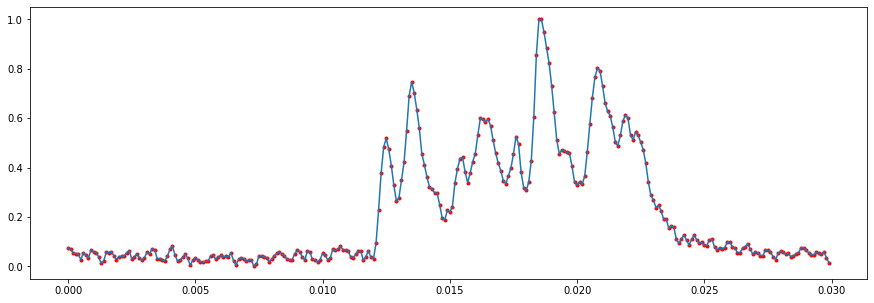

In [23]:
%matplotlib inline

tmin = np.min(A[0])
tmax = np.max(A[0])
trng = tmax-tmin

idx = 2
dmin = np.min(A[idx])
dmax = np.max(A[idx])
drng = dmax-dmin

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = [15, 5])
X = A[0]
Y = (A[idx]-dmin) / drng  # normalized to range(0, 1.0)
ax.plot(X,Y, 'r.')
ax.plot(X,Y)

plt.show()
plt.close() # frees up memory


samples: 65536


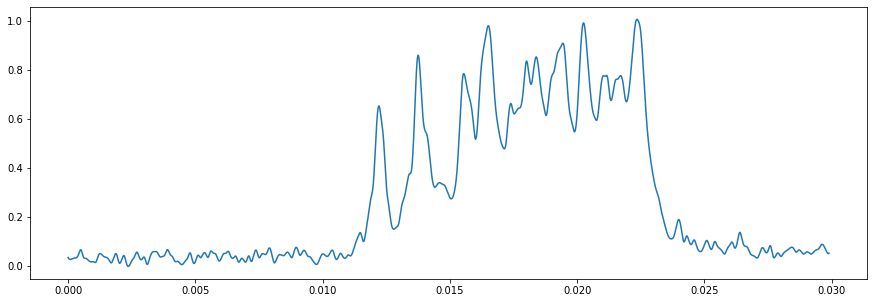

In [18]:
n = 16
p = 2**n
print("samples:", p)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = [15, 5])

f = interp1d(X, Y, kind='cubic')
Xnew = np.linspace(tmin, tmax, p, endpoint=True)
ax.plot(Xnew,f(Xnew))

plt.show()
plt.close() # frees up memory



In [24]:

write("../results/" + results_sel + "/data" + str(idx) + ".wav", int(p/trng), f(Xnew))


TypeError: f() missing 2 required positional arguments: 'w2' and 'w3'